In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from config import *

In [5]:
ela=pd.read_csv(f'ela_data/lhs_samples_dimension_3_50_samples.csv',index_col=[0]).set_index(['problem_id','instance_id'])

ela_groups=list(set([x.split('.')[0] for x in ela.columns])) + ['all']

In [6]:
def get_accuracy_from_report_file(test_report):
    if os.path.isfile(test_report):
        report=pd.read_csv(test_report,index_col=0)
        return report.loc['support','accuracy']
    else:
        print(test_report)
        return None

In [13]:
model='nn'

In [14]:
#RF ela
if model=='rf':
    all_accuracies=[]
    for dimension in [3,5,10,20]:
        for fold in range(0,10):
            config_dir=f'dim_{dimension}_instances_999_samples_50_fold_{fold}_n_heads_1_n_layers_1_d_model_30_d_k_None_d_v_None'
            test_report=os.path.join('results/problem_classification_stats', config_dir, 'test_classification_report.csv')
            accuracy=get_accuracy_from_report_file(test_report)
            all_accuracies+=[(dimension,'transformer',accuracy)]

            for group in ela_groups:
                accuracy =get_accuracy_from_report_file(f'results_ela/dim_{dimension}_fold_{fold}_features_{group}_classification_report.csv')
                all_accuracies+=[(dimension,group if group!='all' else 'all ELA',accuracy)]

In [15]:
#NN ela
if model == 'nn':
    all_accuracies=[]
    for dimension in [3,5,10,20]:
        for fold in range(0,10):
            config_dir=f'dim_{dimension}_instances_999_samples_50_fold_{fold}_n_heads_1_n_layers_1_d_model_30_d_k_None_d_v_None'
            test_report=os.path.join('results/problem_classification_stats', config_dir, 'test_classification_report.csv')
            accuracy=get_accuracy_from_report_file(test_report)
            all_accuracies+=[(dimension,'transformer',accuracy)]

            for group in ela_groups:
                group_results=accuracy =pd.read_csv(f'results_ela_nn/dimension_{dimension}_group_{group}.csv',index_col=0)
                all_accuracies+=[(dimension,group if group!='all' else 'all ELA',accuracy) for accuracy in group_results['accuracy']]

In [12]:
accuracy_df=pd.DataFrame(all_accuracies, columns=['dimension', 'feature group', 'accuracy'])

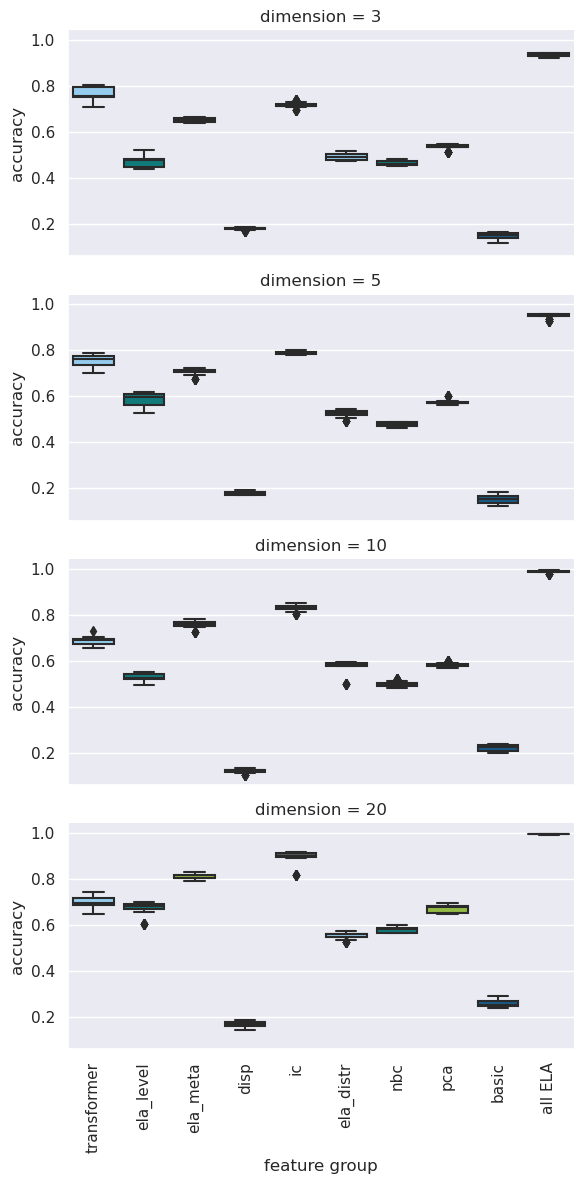

In [16]:

sns.set(font_scale=1)
g=sns.catplot(
    height=3, aspect=2, data=accuracy_df,x='feature group', y='accuracy', row='dimension', kind='box', palette=color_palette_4
)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f'figures/ela_accuracy_box_plot_model_{model}.pdf')

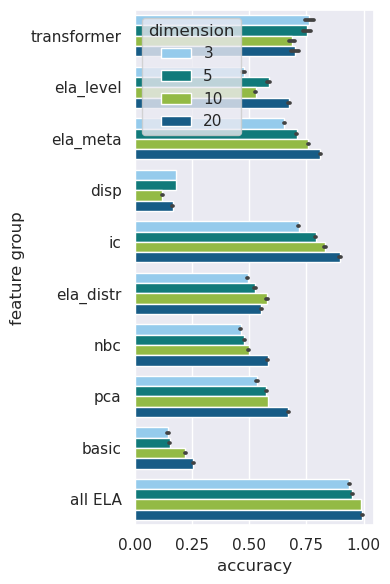

In [17]:
plt.figure(figsize=(4,6))
sns.set(font_scale=1)
g=sns.barplot(data=accuracy_df,y='feature group',x='accuracy', hue='dimension', palette=color_palette_4
)
plt.tight_layout()
plt.savefig(f'figures/ela_accuracy_bar_plot_horizontal_model_{model}.pdf')

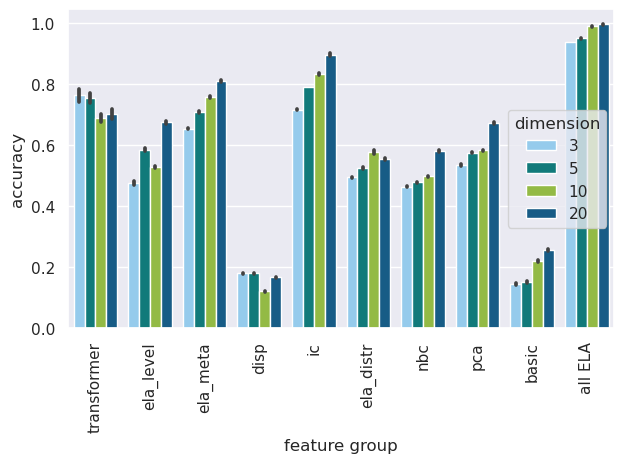

In [18]:
plt.figure()
sns.set(font_scale=1)
g=sns.barplot(data=accuracy_df,x='feature group',y='accuracy', hue='dimension', palette=color_palette_4
)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f'figures/ela_accuracy_bar_plot_model_{model}.pdf')